In [71]:
# Decision Tree (classification algorithm) were applied to choose this problem.

In [72]:
# Imported Required libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [74]:
df = pd.read_csv('term-deposit-marketing-2020.csv', header = 0)

In [75]:
df['y'] = df['y'].replace(['no','yes'],[0,1])

In [76]:
df['default'] = df['default'].replace(['no','yes'],[0,1])

In [77]:
df['housing'] = df['housing'].replace(['no','yes'],[0,1])

In [78]:
df['loan'] = df['loan'].replace(['no','yes'],[0,1])

In [79]:
len(df.loc[(df['contact'] == 'unknown')])

12765

In [80]:
# Merely job attribute contains 235 unknown values. when we exemine others attributes: 
# education = 1531
# contact = 12765


In [81]:
df_cleaned = df.loc[(df['job'] != 'unknown') 
                    & (df['education'] != 'unknown')
                    & (df['contact'] != 'unknown')]

In [82]:
# I removed all lines which contains unknown data. However, It can be good way to remove unknown lines from job and 
# education attribute because It Is only 4.5 per cent of data.
# but contact attribute has huge unknown data that we can not neglect or delete. We can Impute a value for unknown
# data in contact attribute. A classification algorithm may be a good vay to impute and fill unknown data for this 
# attribute

In [83]:
X = df_cleaned.drop('y', axis = 1)

In [84]:
y = df_cleaned['y'].copy()

In [85]:
# we need to define our training data but first we need to remove output column (y) from it and create a new data 
# frame for output attribute.

In [86]:
X_Encoded = pd.get_dummies(X, columns = ['job','marital','education','contact','month'])

In [87]:
# We have many categorical data and they contains text data except 'campaing' attribute. One hot label encoding 
# method may be a good choice in order to obtain more accurate result. here is get_dummies method from pandas 
# library is easy way to achieve this.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, random_state = 42)

In [89]:
# here is the line where we define our train and test data. default test size is 25 per cent for this method. 

In [90]:
clf_dt = DecisionTreeClassifier(criterion="entropy",max_depth = 8)

In [91]:
# here is created an object from DecisionTreeClassifier. 

In [92]:
clf_dt = clf_dt.fit(X_train,y_train)

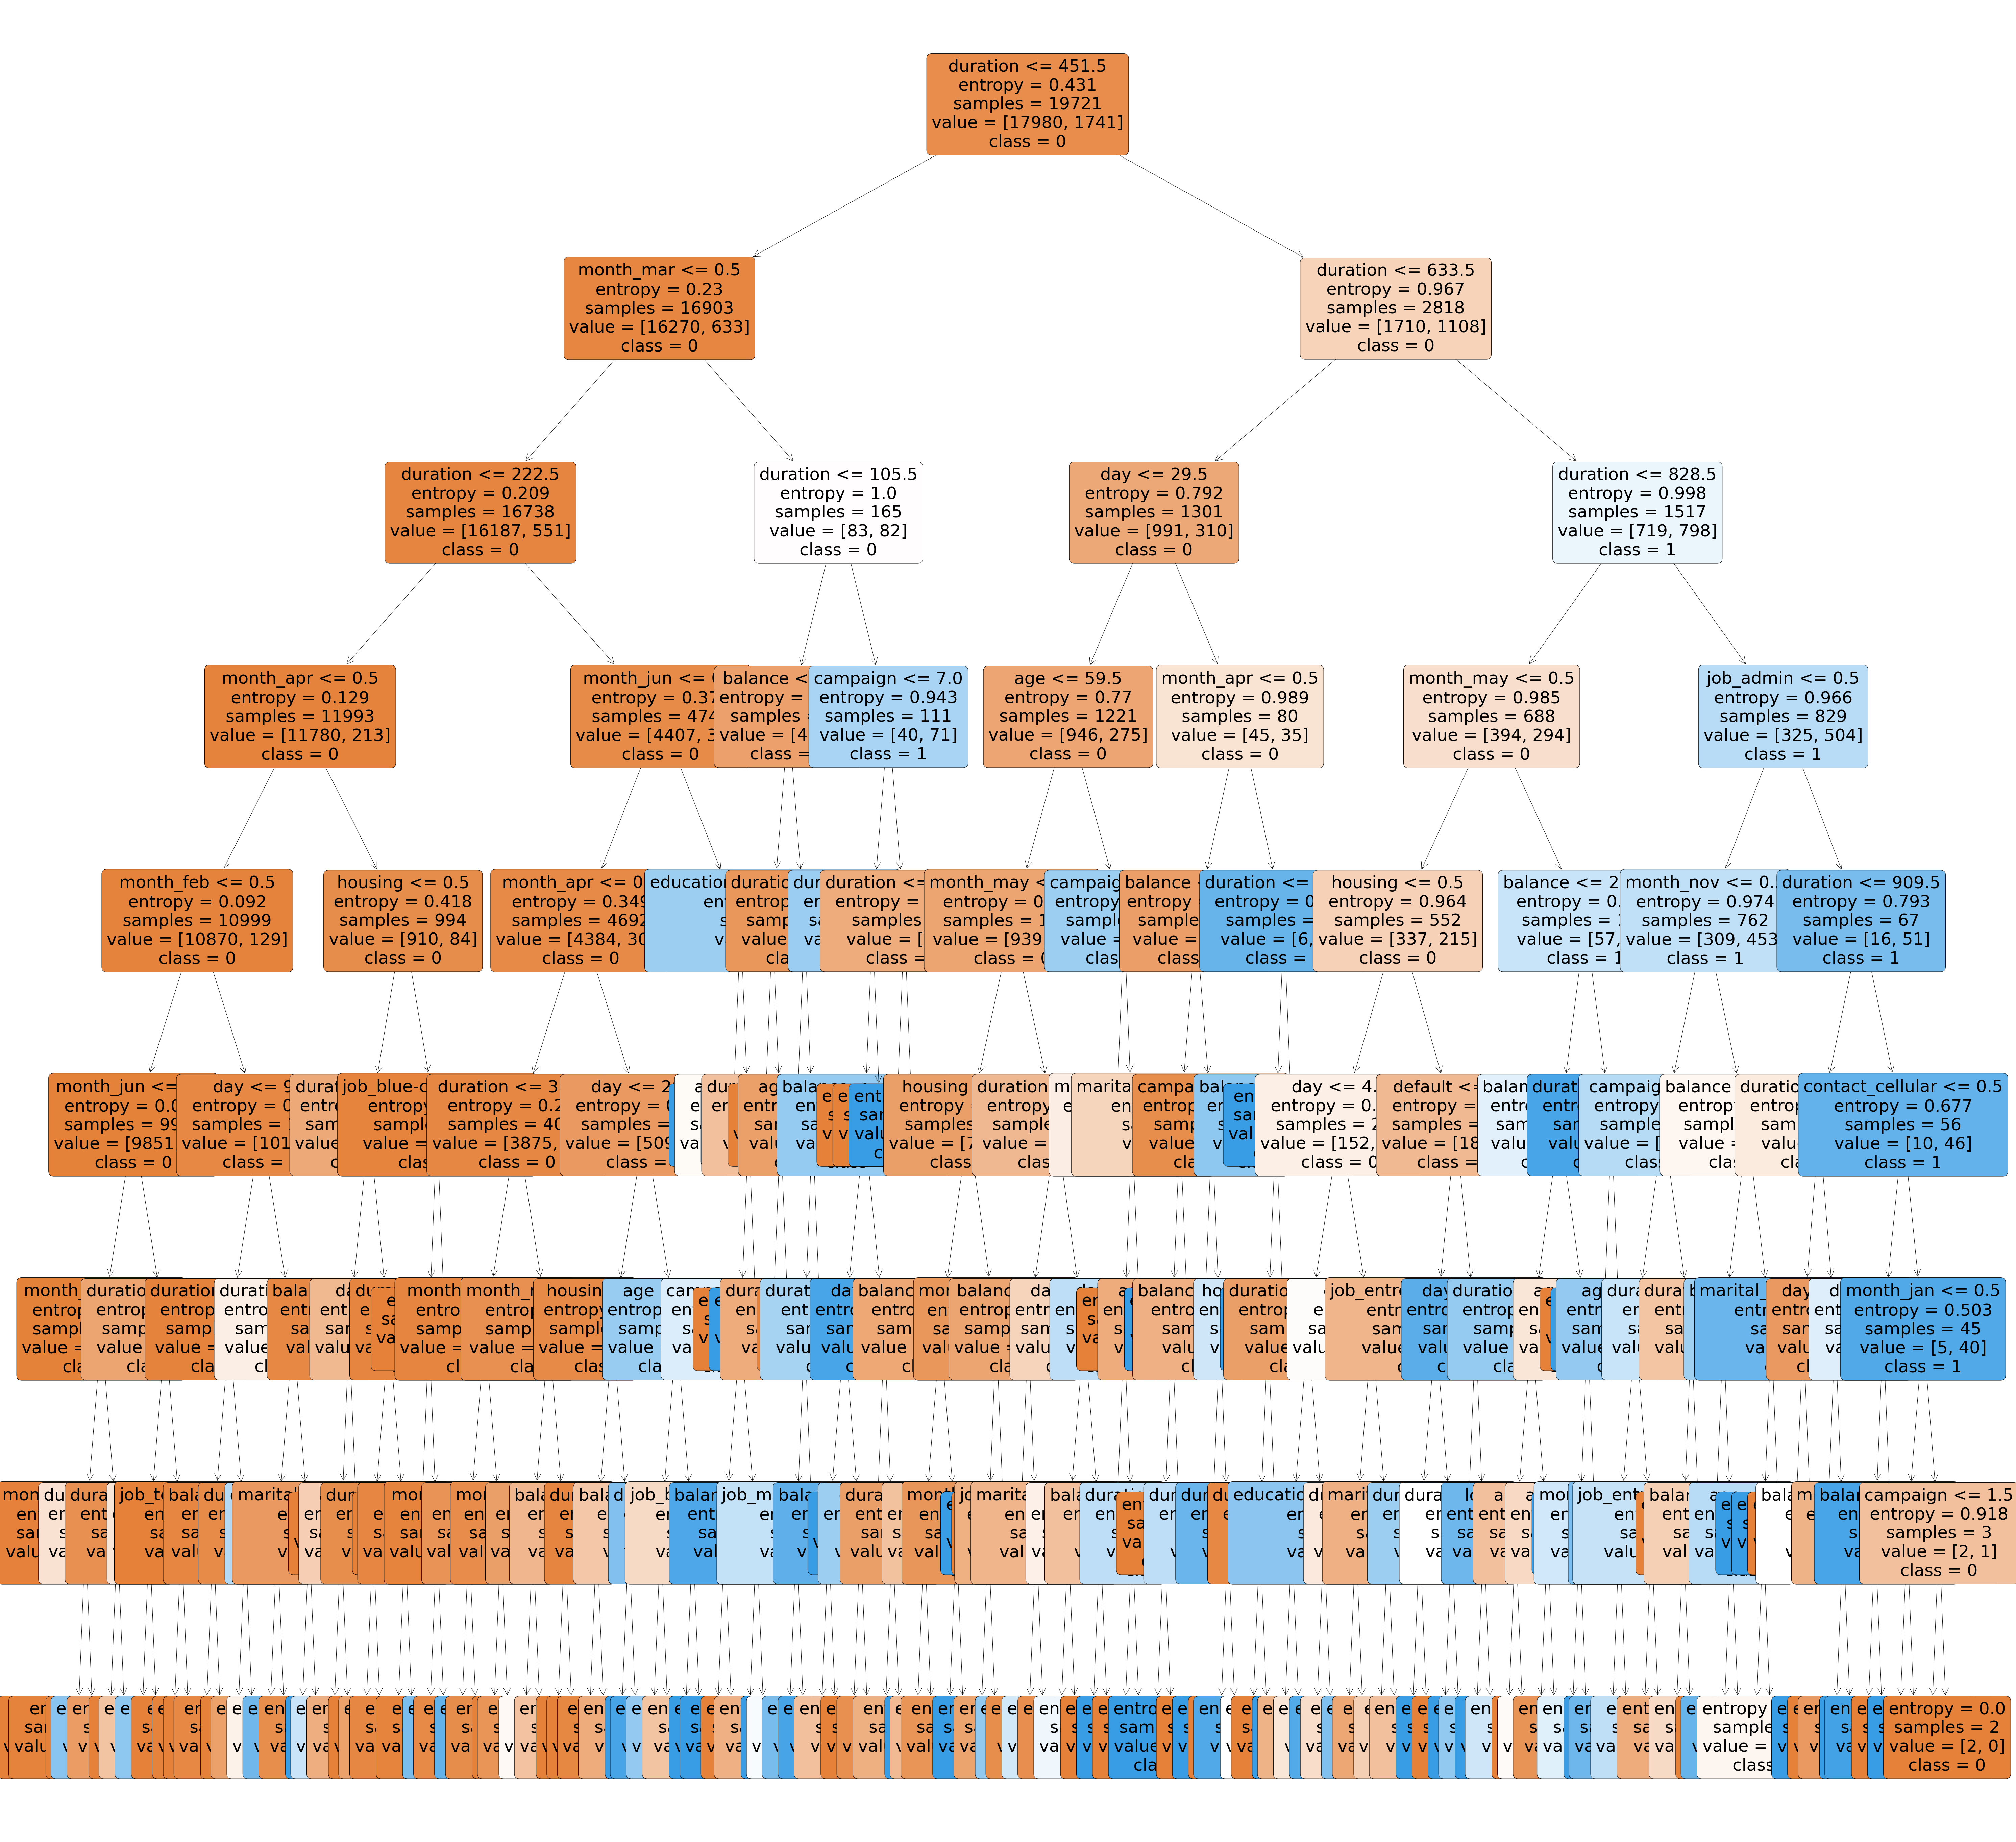

In [93]:
plt.figure(figsize=(100,100))
plot_tree(clf_dt, filled = True,rounded = True,class_names=["0","1"],feature_names = X_Encoded.columns,fontsize = 50);

In [94]:
# here I plotted my decision tree by using matplotlib library. the tree may looks huge and it is not desired result
# because it may perform some overfitting problems.Post pruning technique may be a good solution to obtain better tree. 

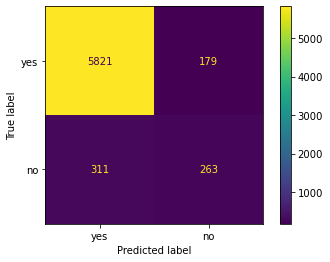

In [95]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels = ["yes","no"])

In [96]:
# when we apply our test data to the model it performs 93 per cent accurancy.

In [97]:
# Conclusion:

In [98]:
# Overfitting problem should be exemined.
# We need to pre-process the data. For instance, we can make concat the day and month attribute to obtain one date 
# column. 
# We may perform dimentoin reduction to get rid of unrelated attributes. We are not sure that all attribute is 
# directly effect the output. 
